In [1]:
import pandas as pd

# Bupa Financial Dataset (FY2023–H1 2025)
data = {
    "Period": [
        "2023 FY", "2024 FY", "2024 FY (Underlying)", 
        "2025 H1", "2025 H1 (Underlying)"
    ],
    "Revenue_GBP_m": [
        14600, 16900, 16900,
        8800, 8800
    ],
    "Profit_PreTax_GBP_m": [
        564, 972, 914,
        501, 480
    ],
    "Customer_Base_m": [
        50, 60.5, 60.5,
        40, 40
    ]
}

bupa_df = pd.DataFrame(data)
print(bupa_df)


                 Period  Revenue_GBP_m  Profit_PreTax_GBP_m  Customer_Base_m
0               2023 FY          14600                  564             50.0
1               2024 FY          16900                  972             60.5
2  2024 FY (Underlying)          16900                  914             60.5
3               2025 H1           8800                  501             40.0
4  2025 H1 (Underlying)           8800                  480             40.0


In [2]:
import pandas as pd

bupa_global_salaries = [
    # UK
    {"Region": "UK", "Role": "Care Assistant", "Min_Annual": 19000, "Max_Annual": 21000},
    {"Region": "UK", "Role": "Registered Nurse", "Min_Annual": 34000, "Max_Annual": 40000},
    {"Region": "UK", "Role": "Manager", "Min_Annual": 31000, "Max_Annual": 61000},
    {"Region": "UK", "Role": "Project Manager", "Min_Annual": 56000, "Max_Annual": 80000},
    
    # Australia
    {"Region": "Australia", "Role": "Customer Service Rep", "Min_Annual": 50210, "Max_Annual": 59970},
    {"Region": "Australia", "Role": "Manager", "Min_Annual": 140000, "Max_Annual": 190000},
    {"Region": "Australia", "Role": "Registered Nurse", "Min_Annual": 74000, "Max_Annual": 93000},
    
    # Spain
    {"Region": "Spain", "Role": "Art Director", "Min_Annual": 24000, "Max_Annual": 26000},
    {"Region": "Spain", "Role": "Director", "Min_Annual": 116000, "Max_Annual": 126000},
    
    # Chile
    {"Region": "Chile", "Role": "Senior Data Scientist", "Min_Annual": 39511218, "Max_Annual": 55921192},  # CLP
]

bupa_global_df = pd.DataFrame(bupa_global_salaries)
print(bupa_global_df)


      Region                   Role  Min_Annual  Max_Annual
0         UK         Care Assistant       19000       21000
1         UK       Registered Nurse       34000       40000
2         UK                Manager       31000       61000
3         UK        Project Manager       56000       80000
4  Australia   Customer Service Rep       50210       59970
5  Australia                Manager      140000      190000
6  Australia       Registered Nurse       74000       93000
7      Spain           Art Director       24000       26000
8      Spain               Director      116000      126000
9      Chile  Senior Data Scientist    39511218    55921192


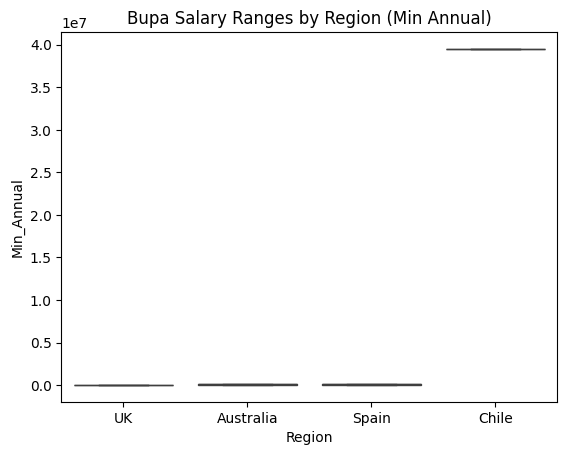

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Region", y="Min_Annual", data=bupa_global_df)
plt.title("Bupa Salary Ranges by Region (Min Annual)")
plt.show()


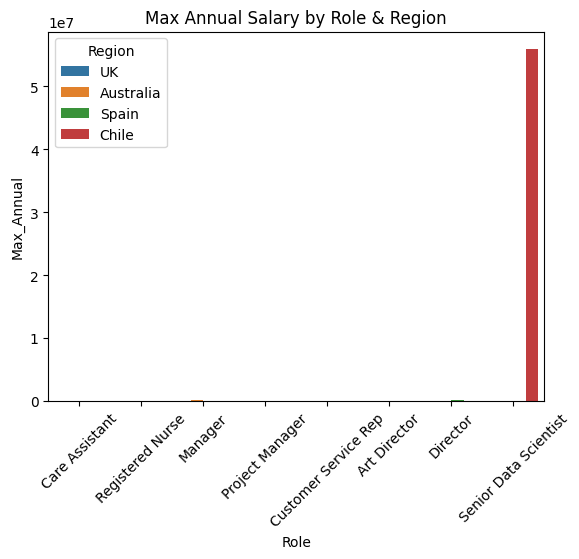

In [4]:
sns.barplot(x="Role", y="Max_Annual", hue="Region", data=bupa_global_df)
plt.title("Max Annual Salary by Role & Region")
plt.xticks(rotation=45)
plt.show()


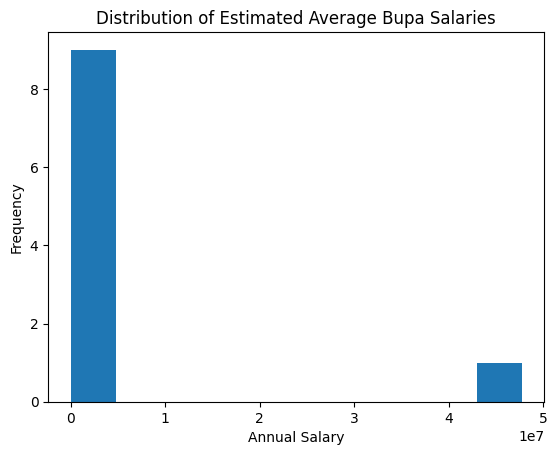

In [5]:
bupa_global_df['Avg_Annual'] = (bupa_global_df['Min_Annual'] + bupa_global_df['Max_Annual'])/2
bupa_global_df['Avg_Annual'].plot(kind='hist', bins=10)
plt.title("Distribution of Estimated Average Bupa Salaries")
plt.xlabel("Annual Salary")
plt.show()


In [6]:
import pandas as pd

# Raw salary entries by region (annual wages in local currency)
salary_records = [
    {"Region":"UK", "Role":"Manager", "Annual_Low":31000, "Annual_High":61000, "Currency":"GBP"},
    {"Region":"Australia", "Role":"Registered Nurse", "Annual_Low":74000, "Annual_High":93000, "Currency":"AUD"},
    {"Region":"Australia", "Role":"Manager", "Annual_Low":140000, "Annual_High":190000, "Currency":"AUD"},
    {"Region":"Spain", "Role":"Director", "Annual_Low":116000, "Annual_High":126000, "Currency":"EUR"},
    {"Region":"Chile", "Role":"Senior Data Scientist", "Annual_Low":39511218, "Annual_High":55921192, "Currency":"CLP"},
    # Add more roles as needed...
]

# Conversion rates (approx, 2026)
exchange_rates = {
    "GBP": 1.0,
    "AUD": 0.50,
    "EUR": 0.87,
    "CLP": 0.000845
}

# Build DataFrame and add converted columns
df = pd.DataFrame(salary_records)
df["Annual_Low_GBP"] = df.apply(lambda r: r["Annual_Low"] * exchange_rates[r["Currency"]], axis=1)
df["Annual_High_GBP"] = df.apply(lambda r: r["Annual_High"] * exchange_rates[r["Currency"]], axis=1)
print(df)


      Region                   Role  Annual_Low  Annual_High Currency  \
0         UK                Manager       31000        61000      GBP   
1  Australia       Registered Nurse       74000        93000      AUD   
2  Australia                Manager      140000       190000      AUD   
3      Spain               Director      116000       126000      EUR   
4      Chile  Senior Data Scientist    39511218     55921192      CLP   

   Annual_Low_GBP  Annual_High_GBP  
0     31000.00000      61000.00000  
1     37000.00000      46500.00000  
2     70000.00000      95000.00000  
3    100920.00000     109620.00000  
4     33386.97921      47253.40724  


In [7]:
# Add global revenue & headcount
bupa_financials = {
    "Total_Revenue_GBP": 16900,   # in million GBP
    "Profit_GBP": 972,           # in million GBP
    "Total_Employees": 87132     # from corporate reporting
}

# Compute revenue per employee
rev_per_emp = bupa_financials["Total_Revenue_GBP"] * 1_000_000 / bupa_financials["Total_Employees"]
print(f"Revenue per employee (GBP): {rev_per_emp:.2f}")

# Compare against average salaries
df["Avg_Salary_GBP"] = (df["Annual_Low_GBP"] + df["Annual_High_GBP"]) / 2
df


Revenue per employee (GBP): 193958.59


,Region,Role,Annual_Low,Annual_High,Currency,Annual_Low_GBP,Annual_High_GBP,Avg_Salary_GBP
0,UK,Manager,31000,61000,GBP,31000.00000,61000.00000,46000.000000
1,Australia,Registered Nurse,74000,93000,AUD,37000.00000,46500.00000,41750.000000
2,Australia,Manager,140000,190000,AUD,70000.00000,95000.00000,82500.000000
3,Spain,Director,116000,126000,EUR,100920.00000,109620.00000,105270.000000
4,Chile,Senior Data Scientist,39511218,55921192,CLP,33386.97921,47253.40724,40320.193225


In [8]:
# Add global revenue & headcount
bupa_financials = {
    "Total_Revenue_GBP": 16900,   # in million GBP
    "Profit_GBP": 972,           # in million GBP
    "Total_Employees": 87132     # from corporate reporting
}

# Compute revenue per employee
rev_per_emp = bupa_financials["Total_Revenue_GBP"] * 1_000_000 / bupa_financials["Total_Employees"]
print(f"Revenue per employee (GBP): {rev_per_emp:.2f}")

# Compare against average salaries
df["Avg_Salary_GBP"] = (df["Annual_Low_GBP"] + df["Annual_High_GBP"]) / 2
df


Revenue per employee (GBP): 193958.59


,Region,Role,Annual_Low,Annual_High,Currency,Annual_Low_GBP,Annual_High_GBP,Avg_Salary_GBP
0,UK,Manager,31000,61000,GBP,31000.00000,61000.00000,46000.000000
1,Australia,Registered Nurse,74000,93000,AUD,37000.00000,46500.00000,41750.000000
2,Australia,Manager,140000,190000,AUD,70000.00000,95000.00000,82500.000000
3,Spain,Director,116000,126000,EUR,100920.00000,109620.00000,105270.000000
4,Chile,Senior Data Scientist,39511218,55921192,CLP,33386.97921,47253.40724,40320.193225


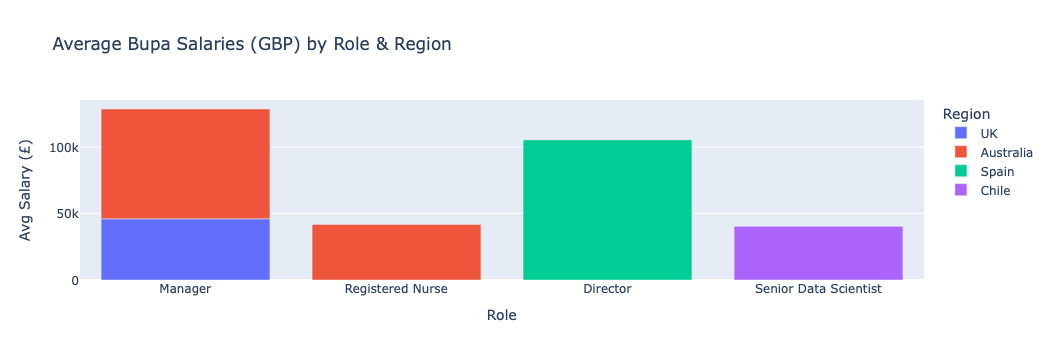

In [9]:
import plotly.express as px

# Bar chart of average salaries by role & region
fig1 = px.bar(df, x="Role", y="Avg_Salary_GBP", color="Region",
              title="Average Bupa Salaries (GBP) by Role & Region",
              labels={"Avg_Salary_GBP":"Avg Salary (£)"})
fig1.show()


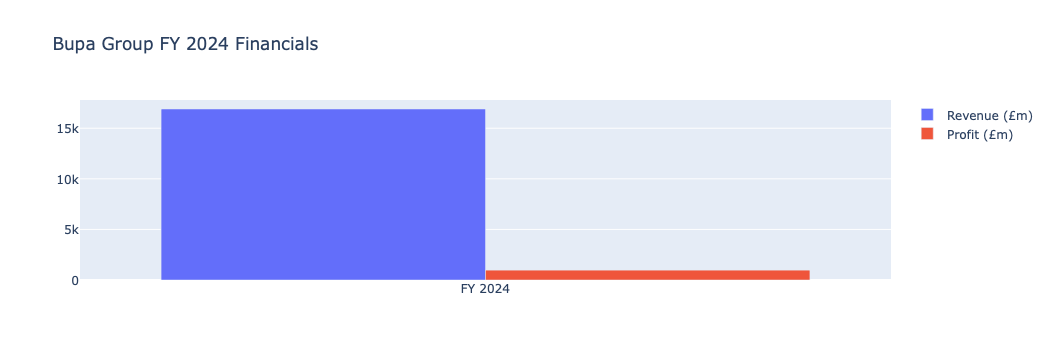

In [10]:
import plotly.graph_objects as go

fig2 = go.Figure(data=[
    go.Bar(name="Revenue (£m)", x=["FY 2024"], y=[bupa_financials["Total_Revenue_GBP"]]),
    go.Bar(name="Profit (£m)", x=["FY 2024"], y=[bupa_financials["Profit_GBP"]])
])
fig2.update_layout(title="Bupa Group FY 2024 Financials", barmode="group")
fig2.show()


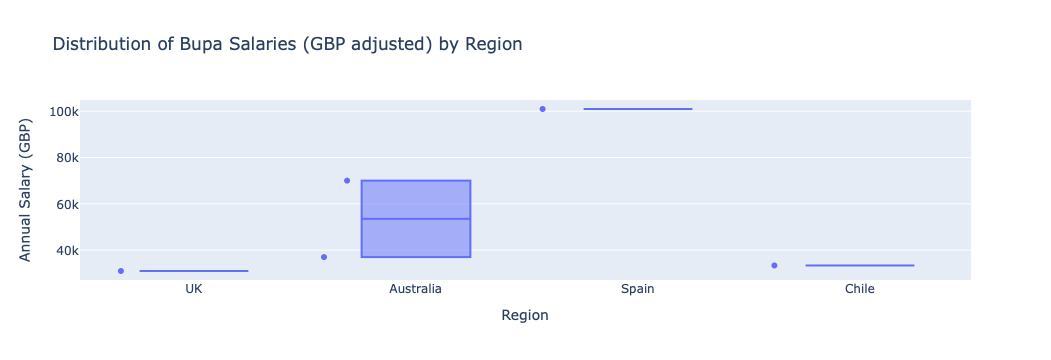

In [11]:
fig3 = px.box(df, x="Region", y="Annual_Low_GBP", points="all",
              title="Distribution of Bupa Salaries (GBP adjusted) by Region",
              labels={"Annual_Low_GBP":"Annual Salary (GBP)"})
fig3.show()
